## Anonymous data from Data Science for Finance Dojo
---
### The data seems to be prices of 42 assets between Jul 1998 and Apr 2019. The prices are normalised in 100. Very clean, no missing values
---
### What's been done:
* [Tidying up the data](#tidying): 
    * drop 'Unnamed' column
    * set 'timestamp' column as index 
    * rescale in 1
    

* [Initial analysis](#IntAna):
    * plot: [cumulative returns](#CumRet), [daily returns](#DRet), [sharpe ratio](#sharpe) for each assets
    * plot: [correlations](#RetCor) between assets' daily returns
    * plot: [cumulative, daily returns and sharpe ratio](#2type) for two types


* [Porfolio optimisation](#opt) with [optimal frontier](#OptFrt)


* [Comparison with SP500](#sp) using the [weights](#weight) calculated from optimisation, and [graphs](#compare)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns 
sns.set_style('white')

%matplotlib inline

from IPython.display import display, HTML, display_html

# set formatting
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## Tidying up data
<a id="tidying"></a> 

In [5]:
data = pd.read_csv('coding_dojo_data.csv')
data.head()

Unnamed: 0    column_0    column_1    column_2    column_3    column_4  \
0           0  100.000000  100.000000  100.000000  100.000000  100.000000   
1           1  100.063852  100.023130  100.168052  100.143585  100.020144   
2           2  100.107540  100.156511  100.409448  100.295993  100.040288   
3           3  100.132745  100.185038  100.590317  100.206955  100.060433   
4           4  100.242806  100.274473  100.610255  100.441182  100.508468   

     column_5    column_6    column_7    column_8    column_9   column_10  \
0  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1  100.072078  100.051591  100.019917   99.926170  100.368378   99.948764   
2  100.149412  100.121391  100.064729   99.952228  100.452813  100.027589   
3  100.175690  100.146427  100.089624   99.978285  100.332511  100.051236   
4  100.340118  100.233677  100.290449  100.056458  100.461780  100.096166   

    column_11   column_12   column_13   column_14   column_15   column_16  \
0  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1  100.074785  100.203194  100.267642   99.820511  100.522013  100.123582   
2  100.140152  100.307718  100.342176   99.877146  100.572638  100.260991   
3  100.162864  100.288486  100.343023   99.799599  100.440682  100.159878   
4  100.296369  100.408897  100.388759   99.943365  100.515374  100.375930   

    column_17   column_18   column_19   column_20   column_21   column_22  \
0  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1  100.073098   98.581680  100.121927  100.131701  100.102021  100.076049   
2  100.147045   98.573626  100.351866  100.384534  100.286280  100.187471   
3  100.090097   98.557518  100.281405  100.306286  100.230978  100.138961   
4  100.295790   98.678329  100.629074  100.662569  100.561594  100.431031   

    column_23   column_24   column_25   column_26   column_27   column_28  \
0  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1  100.021541  100.069763  100.029966  100.020676  100.120238  100.059721   
2   99.911349  100.129336  100.242036  100.041352  100.255001  100.203704   
3   99.933719  100.152067  100.267392  100.062027  100.241283  100.148892   
4  100.083680  100.297864  100.381879  100.315651  100.461584  100.400046   

    column_29   column_30   column_31   column_32   column_33   column_34  \
0  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1  100.085169  100.033062  100.059106  100.063392  100.081080  100.062323   
2  100.223003  100.051464  100.130671  100.173411  100.193211  100.143590   
3  100.171599  100.033374  100.091267  100.121021  100.146387  100.104055   
4  100.447266  100.145347  100.296979  100.390306  100.448033  100.335227   

    column_35   column_36   column_37   column_38   column_39   column_40  \
0  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1  100.096021  100.157381  100.111776  100.147979  100.116238  100.070953   
2  100.134066  100.287830  100.252272  100.269504  100.270692  100.141906   
3  100.057975  100.239017  100.211133  100.253797  100.249196  100.122707   
4  100.252733  100.467093  100.475825  100.484446  100.493615  100.252926   

    column_41   timestamp  
0  100.000000  1998-06-30  
1  100.091812  1998-07-01  
2  100.201644  1998-07-02  
3  100.103825  1998-07-03  
4  100.443617  1998-07-06

In [6]:
data.describe()

Unnamed: 0     column_0     column_1     column_2     column_3  \
count  5264.000000  5264.000000  5264.000000  5264.000000  5264.000000   
mean   2631.500000   256.407637   189.958175   225.208205   206.141534   
std    1519.730239   121.032977    59.931957    92.070264    74.566680   
min       0.000000    92.849401    77.099219    98.400661    99.063891   
25%    1315.750000   152.248267   139.691642   154.950047   150.084426   
50%    2631.500000   218.980046   180.268382   188.611651   179.286488   
75%    3947.250000   367.348246   242.225508   290.062877   262.471223   
max    5263.000000   489.706364   304.847228   422.842922   359.622990   

          column_4     column_5     column_6     column_7     column_8  \
count  5264.000000  5264.000000  5264.000000  5264.000000  5264.000000   
mean    217.737712   228.227518   190.627471   185.851207   168.374360   
std     100.789545    86.065827    83.214708    82.749361    79.553843   
min      84.304191    93.840332    80.670076    56.567886    50.006080   
25%     131.575520   161.637035   121.301382   112.248658    98.471728   
50%     178.629777   209.338234   159.456322   167.111192   139.183966   
75%     311.332852   302.601566   265.134933   261.003253   249.071484   
max     424.762090   406.077078   352.398980   358.684846   309.579606   

          column_9    column_10    column_11    column_12    column_13  \
count  5264.000000  5264.000000  5264.000000  5264.000000  5264.000000   
mean    195.031931   287.816640   198.953826   206.948893   198.951344   
std      64.359920   123.025200    86.486652    73.251964    67.546821   
min     100.000000    87.924076    88.975645   100.000000   100.000000   
25%     146.151274   194.291525   122.811997   150.089263   148.559305   
50%     171.766420   267.979490   165.577351   177.565432   175.817749   
75%     247.923672   407.290681   282.164086   265.487917   255.550615   
max     321.441381   483.842540   367.775048   351.279371   336.700037   

         column_14    column_15    column_16    column_17    column_18  \
count  5264.000000  5264.000000  5264.000000  5264.000000  5264.000000   
mean    195.181178   202.174097   190.285105   194.771787   187.975440   
std      61.188682    69.229914    61.322611    58.987334    49.335386   
min      99.742093   100.000000   100.000000   100.000000    98.557518   
25%     146.378191   150.640068   141.293761   145.507051   146.211572   
50%     171.987018   178.321507   165.744990   173.465164   178.627749   
75%     250.364207   257.809660   243.567706   250.579256   236.336893   
max     307.070663   339.689614   308.566885   297.498534   265.287006   

         column_19    column_20    column_21    column_22    column_23  \
count  5264.000000  5264.000000  5264.000000  5264.000000  5264.000000   
mean    214.091136   214.889857   208.516967   197.599729   315.996617   
std      85.978627    88.237555    75.057416    62.194580   221.913650   
min      99.256730    99.129108    99.516590    99.909296    81.649240   
25%     141.068940   140.366120   141.873868   141.239910   123.255149   
50%     184.733030   181.696523   195.240513   195.317020   163.796832   
75%     267.061863   264.566972   271.577875   254.403100   544.431556   
max     404.336590   416.958116   350.556588   300.336285   730.590399   

         column_24    column_25    column_26    column_27    column_28  \
count  5264.000000  5264.000000  5264.000000  5264.000000  5264.000000   
mean    229.059209   270.586022   306.333713   201.164311   230.924633   
std     106.973564   128.834422   157.379293    69.202830    92.965207   
min      85.523026    95.398245    86.834325    99.853132   100.000000   
25%     139.351558   168.542637   169.760057   141.550464   150.652835   
50%     186.728983   214.474129   238.811623   173.057835   196.503076   
75%     339.244366   398.541638   461.545552   261.122207   313.980333   
max     440.808936   517.975965   595.199074   330.634033   395.017834   

      

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5264 entries, 0 to 5263
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5264 non-null   int64  
 1   column_0    5264 non-null   float64
 2   column_1    5264 non-null   float64
 3   column_2    5264 non-null   float64
 4   column_3    5264 non-null   float64
 5   column_4    5264 non-null   float64
 6   column_5    5264 non-null   float64
 7   column_6    5264 non-null   float64
 8   column_7    5264 non-null   float64
 9   column_8    5264 non-null   float64
 10  column_9    5264 non-null   float64
 11  column_10   5264 non-null   float64
 12  column_11   5264 non-null   float64
 13  column_12   5264 non-null   float64
 14  column_13   5264 non-null   float64
 15  column_14   5264 non-null   float64
 16  column_15   5264 non-null   float64
 17  column_16   5264 non-null   float64
 18  column_17   5264 non-null   float64
 19  column_18   5264 non-null  

In [8]:
# Remove column 'Unamed' and set timestamp as index
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
# check timestamp type
type(data['timestamp'][0])

str

In [10]:
data.index = pd.to_datetime(data['timestamp'])

In [11]:
data.drop(['timestamp'], axis=1, inplace=True)

In [12]:
data.index

DatetimeIndex(['1998-06-30', '1998-07-01', '1998-07-02', '1998-07-03',
               '1998-07-06', '1998-07-07', '1998-07-08', '1998-07-09',
               '1998-07-10', '1998-07-13',
               ...
               '2019-03-21', '2019-03-22', '2019-03-25', '2019-03-26',
               '2019-03-27', '2019-03-28', '2019-03-29', '2019-03-31',
               '2019-04-01', '2019-04-02'],
              dtype='datetime64[ns]', name='timestamp', length=5264, freq=None)

In [13]:
# change scale
assets = data/100
assets.tail()

column_0  column_1  column_2  column_3  column_4  column_5  \
timestamp                                                                
2019-03-28  4.869582  3.036877  4.199704  3.586973  4.235736  4.043780   
2019-03-29  4.890107  3.036869  4.198102  3.590823  4.240355  4.048908   
2019-03-31  4.890813  3.037370  4.198942  3.591529  4.241057  4.049591   
2019-04-01  4.897064  3.044671  4.185206  3.584174  4.244912  4.060771   
2019-04-02  4.893879  3.048472  4.210243  3.596230  4.247621  4.059810   

            column_6  column_7  column_8  column_9  column_10  column_11  \
timestamp                                                                  
2019-03-28  3.510857  3.574260  3.086389  3.203258   4.702453   3.661074   
2019-03-29  3.513543  3.578865  3.095327  3.208182   4.716941   3.669087   
2019-03-31  3.514150  3.579504  3.095796  3.208847   4.717840   3.669732   
2019-04-01  3.523990  3.586832  3.095535  3.206060   4.731918   3.676595   
2019-04-02  3.516039  3.586848  3.090498  3.214414   4.742047   3.677750   

            column_12  column_13  column_14  column_15  column_16  column_17  \
timestamp                                                                      
2019-03-28   3.503512   3.351746   3.062264   3.386730   3.073285   2.967276   
2019-03-29   3.506029   3.359115   3.065984   3.391485   3.078479   2.970795   
2019-03-31   3.506740   3.359827   3.066611   3.392215   3.079110   2.971356   
2019-04-01   3.501296   3.359386   3.065095   3.387136   3.078600   2.970693   
2019-04-02   3.512794   3.367000   3.070707   3.396896   3.085669   2.974985   

            column_18  column_19  column_20  column_21  column_22  column_23  \
timestamp                                                                      
2019-03-28   2.649077   3.981523   4.080354   3.496267   2.999975   7.278281   
2019-03-29   2.650623   3.974375   4.072035   3.495786   3.001945   7.289185   
2019-03-31   2.651195   3.974932   4.072586   3.496405   3.002365   7.290560   
2019-04-01   2.651122   3.953038   4.049115   3.483212   2.994912   7.301314   
2019-04-02   2.652870   3.983164   4.082144   3.497054   3.003363   7.305904   

            column_24  column_25  column_26  column_27  column_28  column_29  \
timestamp                                                                      
2019-03-28   4.379095   5.160458   5.940433   3.084893   3.845586   3.186685   
2019-03-29   4.393823   5.169264   5.945822   3.084344   3.848073   3.184286   
2019-03-31   4.394599   5.170101   5.946753   3.085014   3.848825   3.184742   
2019-04-01   4.404938   5.175534   5.944492   3.080616   3.843516   3.172705   
2019-04-02   4.408089   5.179760   5.951991   3.091082   3.854732   3.188897   

            column_30  column_31  column_32  column_33  column_34  column_35  \
timestamp                                                                      
2019-03-28   2.091528   2.501162   2.786285   3.140756   2.597958   2.701276   
2019-03-29   2.091881   2.503123   2.788627   3.142355   2.599364   2.703613   
2019-03-31   2.092289   2.503381   2.789036   3.142774   2.599746   2.703903   
2019-04-01   2.091304   2.500748   2.784331   3.132892   2.595795   2.702626   
2019-04-02   2.092689   2.504410   2.790584   3.143237   2.600531   2.706422   

            column_36  column_37  column_38  column_39  column_40  column_41  
timestamp                                                                     
2019-03-28   3.793099   4.231772   3.921803   3.144080   3.715922   4.034125  
2019-03-29   3.795001   4.229351   3.922447   3.143984   3.717057   4.033027  
2019-03-31   3.795800   4.230142   3.923324   3.144669   3.717691   4.033816  
2019-04-01   3.790187   4.215441   3.916288   3.139733   3.712725   4.021486  
2019-04-02   3.801650   4.235646   3.934658   3.150274   3.723067   4.040226

## Initial analysis
<a id="IntAna"></a>

<a id="CumRet"></a>

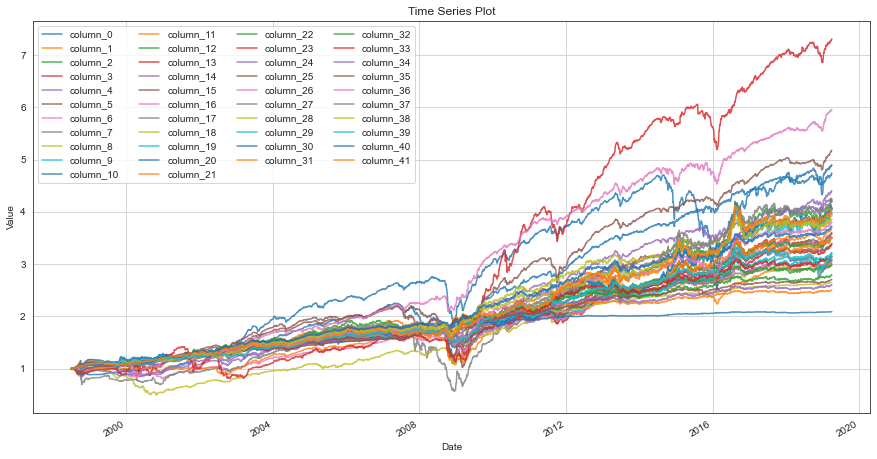

In [14]:
# Asset performance (absolute price) 1998-2019
assets.plot(alpha=0.8, figsize=(15, 8), title='Time Series Plot')
plt.grid()

plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='best', ncol=4)
plt.show()

In [15]:
# caculate the return of assets
# drop first row
returns = assets.pct_change()
returns = returns[1:]
returns.head()

column_0  column_1  column_2  column_3  column_4  column_5  \
timestamp                                                                
1998-07-01  0.000639  0.000231  0.001681  0.001436  0.000201  0.000721   
1998-07-02  0.000437  0.001334  0.002410  0.001522  0.000201  0.000773   
1998-07-03  0.000252  0.000285  0.001801 -0.000888  0.000201  0.000262   
1998-07-06  0.001099  0.000893  0.000198  0.002337  0.004478  0.001641   
1998-07-07 -0.000025  0.000646 -0.000347 -0.001326  0.001044  0.000389   

            column_6  column_7  column_8  column_9  column_10  column_11  \
timestamp                                                                  
1998-07-01  0.000516  0.000199 -0.000738  0.003684  -0.000512   0.000748   
1998-07-02  0.000698  0.000448  0.000261  0.000841   0.000789   0.000653   
1998-07-03  0.000250  0.000249  0.000261 -0.001198   0.000236   0.000227   
1998-07-06  0.000871  0.002006  0.000782  0.001288   0.000449   0.001333   
1998-07-07  0.000325 -0.000364 -0.001406  0.001019   0.000843   0.000555   

            column_12  column_13  column_14  column_15  column_16  column_17  \
timestamp                                                                      
1998-07-01   0.002032   0.002676  -0.001795   0.005220   0.001236   0.000731   
1998-07-02   0.001043   0.000743   0.000567   0.000504   0.001372   0.000739   
1998-07-03  -0.000192   0.000008  -0.000776  -0.001312  -0.001008  -0.000569   
1998-07-06   0.001201   0.000456   0.001441   0.000744   0.002157   0.002055   
1998-07-07  -0.000058   0.000734   0.000131   0.002345  -0.001085  -0.001178   

            column_18  column_19  column_20  column_21  column_22  column_23  \
timestamp                                                                      
1998-07-01  -0.014183   0.001219   0.001317   0.001020   0.000760   0.000215   
1998-07-02  -0.000082   0.002297   0.002525   0.001841   0.001113  -0.001102   
1998-07-03  -0.000163  -0.000702  -0.000779  -0.000551  -0.000484   0.000224   
1998-07-06   0.001226   0.003467   0.003552   0.003299   0.002917   0.001501   
1998-07-07  -0.000490  -0.002700  -0.002829  -0.002439  -0.001874  -0.001060   

            column_24  column_25  column_26  column_27  column_28  column_29  \
timestamp                                                                      
1998-07-01   0.000698   0.000300   0.000207   0.001202   0.000597   0.000852   
1998-07-02   0.000595   0.002120   0.000207   0.001346   0.001439   0.001377   
1998-07-03   0.000227   0.000253   0.000207  -0.000137  -0.000547  -0.000513   
1998-07-06   0.001456   0.001142   0.002535   0.002198   0.002508   0.002752   
1998-07-07   0.000000   0.000375   0.001154  -0.001358  -0.001157  -0.001899   

            column_30  column_31  column_32  column_33  column_34  column_35  \
timestamp                                                                      
1998-07-01   0.000331   0.000591   0.000634   0.000811   0.000623   0.000960   
1998-07-02   0.000184   0.000715   0.001099   0.001120   0.000812   0.000380   
1998-07-03  -0.000181  -0.000394  -0.000523  -0.000467  -0.000395  -0.000760   
1998-07-06   0.001119   0.002055   0.002690   0.003012   0.002309   0.001946   
1998-07-07  -0.000420  -0.001268  -0.001636  -0.001973  -0.001406  -0.001211   

            column_36  column_37  column_38  column_39  column_40  column_41  
timestamp                                                                     
1998-07-01   0.001574   0.001118   0.001480   0.001162   0.000710   0.000918  
1998-07-02   0.001302   0.001403   0.001213   0.001543   0.000709   0.001097  
1998-07-03  -0.000487  -0.000410  -0.000157  -0.000214  -0.000192  -0.000976  
1998-07-06   0.002275   0.002641   0.002301   0.002438   0.001301   0.003394  
1998-07-07  -0.001566  -0.001035  -0.001325  -0.001133  -0.000724  -0.001606

<a id="DRet"></a>
**Plot returns, a few outliers, volitility seems to be great around 1999-2003 and around 2008-2010**

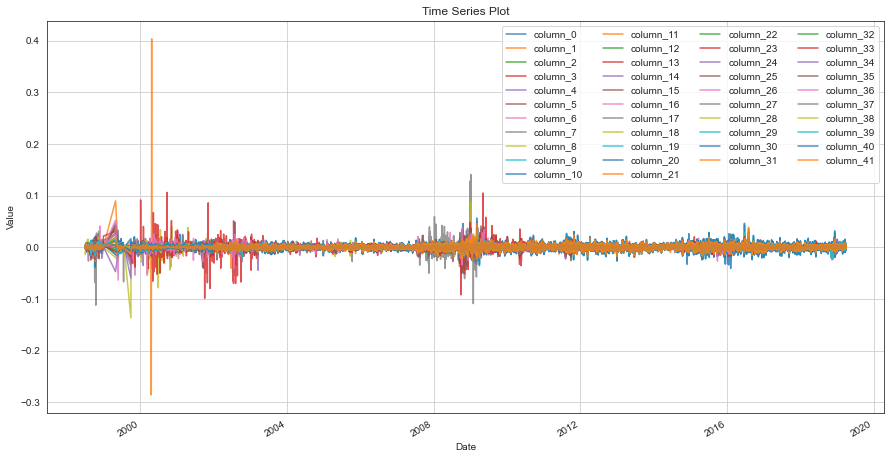

In [16]:
# Ploting volitility using daily returns
returns.plot(alpha=0.8, figsize=(15, 8), title='Time Series Plot')
plt.grid()

plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='best', ncol=4)
plt.show()

In [17]:
# Correlation matrix
returns.corr()

column_0  column_1  column_2  column_3  column_4  column_5  \
column_0   1.000000  0.177777  0.012928  0.054099  0.366326  0.496196   
column_1   0.177777  1.000000  0.014502  0.037111  0.168556  0.203186   
column_2   0.012928  0.014502  1.000000  0.944089  0.000583  0.004255   
column_3   0.054099  0.037111  0.944089  1.000000  0.041744  0.058463   
column_4   0.366326  0.168556  0.000583  0.041744  1.000000  0.485497   
column_5   0.496196  0.203186  0.004255  0.058463  0.485497  1.000000   
column_6   0.432944  0.169114  0.014057  0.060706  0.373625  0.474607   
column_7   0.334734  0.120624 -0.027692 -0.002685  0.269670  0.403211   
column_8   0.250129  0.068139  0.007126  0.045682  0.300467  0.262020   
column_9   0.098831  0.056923  0.857941  0.937954  0.067082  0.118517   
column_10  0.416373  0.180938 -0.012471  0.014237  0.357533  0.522102   
column_11  0.595721  0.249822 -0.004555  0.050265  0.516927  0.755292   
column_12  0.046460  0.035466  0.972648  0.980866  0.030290  0.046876   
column_13  0.105902  0.061962  0.867430  0.925242  0.080582  0.140950   
column_14  0.090400  0.061238  0.832779  0.920701  0.064347  0.104971   
column_15  0.098735  0.055187  0.871924  0.944940  0.064848  0.110882   
column_16  0.087312  0.057364  0.801471  0.889249  0.065472  0.121171   
column_17  0.061166  0.053875  0.728539  0.821718  0.058527  0.067068   
column_18  0.050276  0.068802  0.490222  0.579287  0.038647  0.069440   
column_19 -0.067725 -0.022000  0.937479  0.868070 -0.073383 -0.102766   
column_20 -0.066969 -0.021702  0.937408  0.856742 -0.072212 -0.097731   
column_21 -0.057500 -0.022348  0.901246  0.903361 -0.073209 -0.109436   
column_22 -0.060672 -0.027424  0.862020  0.886594 -0.075900 -0.117720   
column_23  0.166125  0.066303  0.054383  0.079646  0.110079  0.179708   
column_24  0.458768  0.124175  0.026688  0.063339  0.365185  0.509579   
column_25  0.522153  0.216532  0.010602  0.062684  0.485273  0.617113   
column_26  0.303951  0.137892  0.025191  0.055371  0.267999  0.365160   
column_27  0.057727  0.041565  0.830283  0.841593  0.045608  0.052545   
column_28  0.012069  0.014100  0.924207  0.920758 -0.003808 -0.011833   
column_29 -0.069293 -0.022692  0.930032  0.885414 -0.075074 -0.109219   
column_30 -0.066059  0.008163  0.581505  0.639893 -0.052534 -0.092699   
column_31 -0.059128 -0.022182  0.737200  0.788070 -0.071827 -0.111010   
column_32 -0.059254 -0.027986  0.824417  0.857350 -0.075107 -0.114500   
column_33 -0.059565 -0.027209  0.876278  0.895323 -0.075925 -0.115584   
column_34 -0.062826 -0.024007  0.825239  0.861718 -0.075247 -0.118651   
column_35  0.050446  0.056129  0.646081  0.710153  0.045938  0.021278   
column_36  0.084804  0.054921  0.830483  0.870316  0.071205  0.084412   
column_37 -0.002829  0.013557  0.944571  0.912525 -0.007239 -0.017486   
column_38  0.057630  0.039201  0.910378  0.896083  0.040497  0.036729   
column_39  0.046419  0.033313  0.860181  0.876362  0.039510  0.044026   
column_40  0.021241  0.022446  0.929347  0.922416  0.013815  0.004375   
column_41 -0.032322  0.002049  0.909204  0.851679 -0.021414 -0.038273   

           column_6  column_7  column_8  column_9  column_10  column_11  \
column_0   0.432944  0.334734  0.250129  0.098831   0.416373   0.595721   
column_1   0.169114  0.120624  0.068139  0.056923   0.180938   0.249822   
column_2   0.014057 -0.027692  0.007126  0.857941  -0.012471  -0.004555   
column_3   0.060706 -0.002685  0.045682  0.937954   0.014237   0.050265   
column_4   0.373625  0.269670  0.300467  0.067082   0.357533   0.516927   
column_5   0.474607  0.403211  0.262020  0.118517   0.522102   0.755292   
column_6   1.000000  0.294202  0.256073  0.107316   0.437056   0.597593   
column_7   0.294202  1.000000  0.181625  0.028903   0.302039   0.478108   
column_8   0.256073  0.181625  1.000000  0.062416   0.199400   0.343256   
column_9   0.107316  0.028903  0.062416  1.000000   0.048901   0.109112   
column_10  0.437056  0.302039  0.199400  0.048

<a id="RetCor"></a>

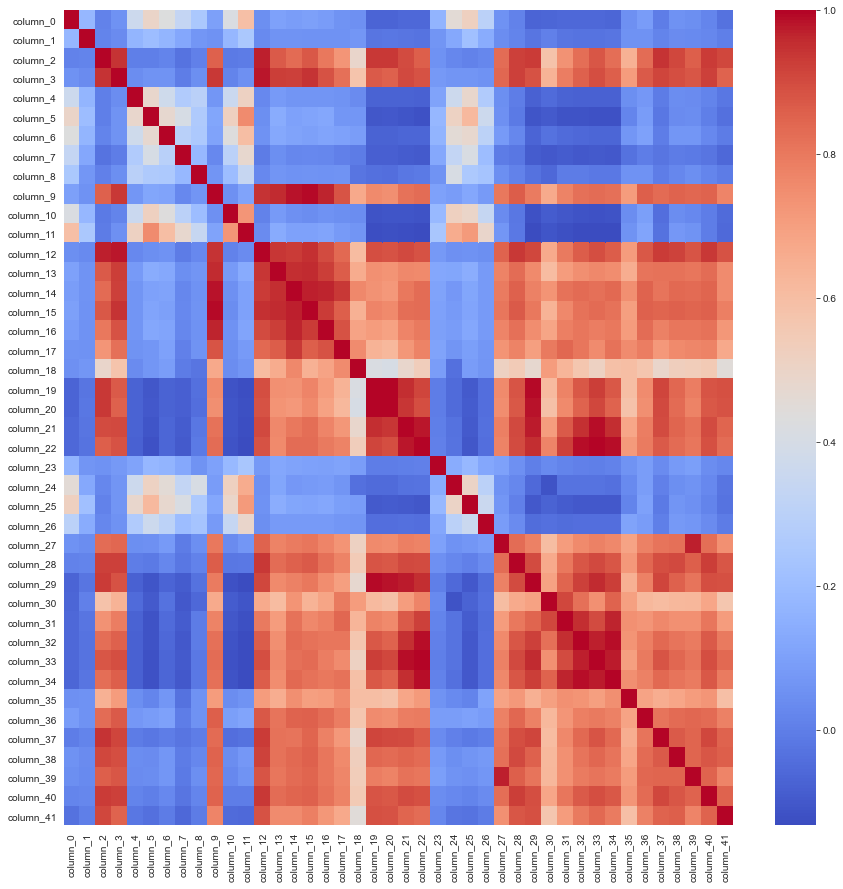

In [18]:
# There seems to be two(?) kinds of assets 
# type I: 0,1,4-11,23-26 No:14
# type II: 2,3,12-22,27-41 No: 28

# A better way to cluster these assets other than arbitrarily looking at the heatmap 

plt.subplots(figsize=(15,15))
sns.heatmap(returns.corr(), cmap='coolwarm')

In [19]:
# From the heatmap above, I see a distinct pattern and arbitrarily devide these assets into two groups
# include this info in the column names

returnsT = returns.transpose()
returnsT['type'] = ['1','1','2','2','1','1','1','1','1','1','1','1','2','2','2','2','2','2','2','2','2','2','2','1','1','1','1','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2']
returnsT.reset_index(inplace=True)
returnsT.rename(columns={'index':'asset'}, inplace=True)
returnsT.set_index(['type','asset'], inplace=True)

In [20]:
returns = returnsT.transpose()
returns.head()

type                        1                   2                   1  \
asset                column_0  column_1  column_2  column_3  column_4   
timestamp                                                               
1998-07-01 00:00:00  0.000639  0.000231  0.001681  0.001436  0.000201   
1998-07-02 00:00:00  0.000437  0.001334  0.002410  0.001522  0.000201   
1998-07-03 00:00:00  0.000252  0.000285  0.001801 -0.000888  0.000201   
1998-07-06 00:00:00  0.001099  0.000893  0.000198  0.002337  0.004478   
1998-07-07 00:00:00 -0.000025  0.000646 -0.000347 -0.001326  0.001044   

type                                                                   \
asset                column_5  column_6  column_7  column_8  column_9   
timestamp                                                               
1998-07-01 00:00:00  0.000721  0.000516  0.000199 -0.000738  0.003684   
1998-07-02 00:00:00  0.000773  0.000698  0.000448  0.000261  0.000841   
1998-07-03 00:00:00  0.000262  0.000250  0.000249  0.000261 -0.001198   
1998-07-06 00:00:00  0.001641  0.000871  0.002006  0.000782  0.001288   
1998-07-07 00:00:00  0.000389  0.000325 -0.000364 -0.001406  0.001019   

type                                            2                      \
asset               column_10 column_11 column_12 column_13 column_14   
timestamp                                                               
1998-07-01 00:00:00 -0.000512  0.000748  0.002032  0.002676 -0.001795   
1998-07-02 00:00:00  0.000789  0.000653  0.001043  0.000743  0.000567   
1998-07-03 00:00:00  0.000236  0.000227 -0.000192  0.000008 -0.000776   
1998-07-06 00:00:00  0.000449  0.001333  0.001201  0.000456  0.001441   
1998-07-07 00:00:00  0.000843  0.000555 -0.000058  0.000734  0.000131   

type                                                                   \
asset               column_15 column_16 column_17 column_18 column_19   
timestamp                                                               
1998-07-01 00:00:00  0.005220  0.001236  0.000731 -0.014183  0.001219   
1998-07-02 00:00:00  0.000504  0.001372  0.000739 -0.000082  0.002297   
1998-07-03 00:00:00 -0.001312 -0.001008 -0.000569 -0.000163 -0.000702   
1998-07-06 00:00:00  0.000744  0.002157  0.002055  0.001226  0.003467   
1998-07-07 00:00:00  0.002345 -0.001085 -0.001178 -0.000490 -0.002700   

type                                                      1            \
asset               column_20 column_21 column_22 column_23 column_24   
timestamp                                                               
1998-07-01 00:00:00  0.001317  0.001020  0.000760  0.000215  0.000698   
1998-07-02 00:00:00  0.002525  0.001841  0.001113 -0.001102  0.000595   
1998-07-03 00:00:00 -0.000779 -0.000551 -0.000484  0.000224  0.000227   
1998-07-06 00:00:00  0.003552  0.003299  0.002917  0.001501  0.001456   
1998-07-07 00:00:00 -0.002829 -0.002439 -0.001874 -0.001060  0.000000   

type                                            2                      \
asset               column_25 column_26 column_27 column_28 column_29   
timestamp                                                               
1998-07-01 00:00:00  0.000300  0.000207  0.001202  0.000597  0.000852   
1998-07-02 00:00:00  0.002120  0.000207  0.001346  0.001439  0.001377   
1998-07-03 00:00:00  0.000253  0.000207 -0.000137 -0.000547 -0.000513   
1998-07-06 00:00:00  0.001142  0.002535  0.002198  0.002508  0.002752   
1998-07-07 00:00:00  0.000375  0.001154 -0.001358 -0.001157 -0.001899   

type                                                                   \
asset               column_30 column_31 column_32 column_33 column_34   
timestamp                                                               
1998-07-01 00:00:00  0.000331  0.000591  0.000634  0.000811  0.000623   
1998-07-02 00:00:00  0.000184  0.000715  0.001099  0.001120  0.000812   
1998-07-03 00:00:00 -0.000181 -0.000394 -0.000523 -0.000467 -0.000395   
1998-07-06 00:00:00  0.001119  0.002055  0.002690  0

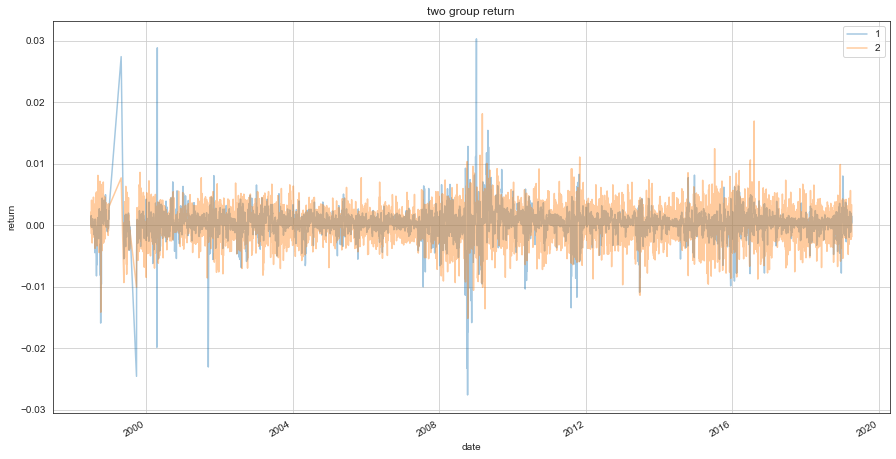

In [21]:
# Plotting return of two asset groups
returns.groupby(level=0, axis=1).mean().plot(alpha=0.4, figsize=(15, 8), title='two group return')
plt.grid()

plt.xlabel('date')
plt.ylabel('return')
plt.legend(loc='best')
plt.show()

# type 2 is more volitial? 

In [22]:
sharp_ratio = returns.mean()/returns.std()

In [23]:
sharp_ratio.groupby('type').mean()

type
1    0.076406
2    0.089578
dtype: float64

<a id="sharpe"></a>

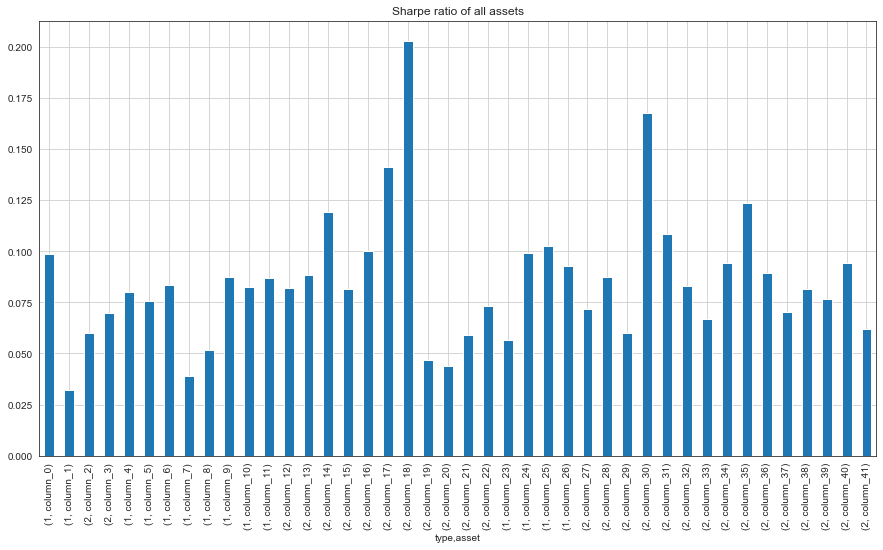

In [24]:
sharp_ratio.plot(kind='bar', figsize=(15,8), title='Sharpe ratio of all assets')
plt.grid()

<a id="2type"></a>

In [25]:
# categorise assets dataframe into the same two groups
assets.columns = returns.columns

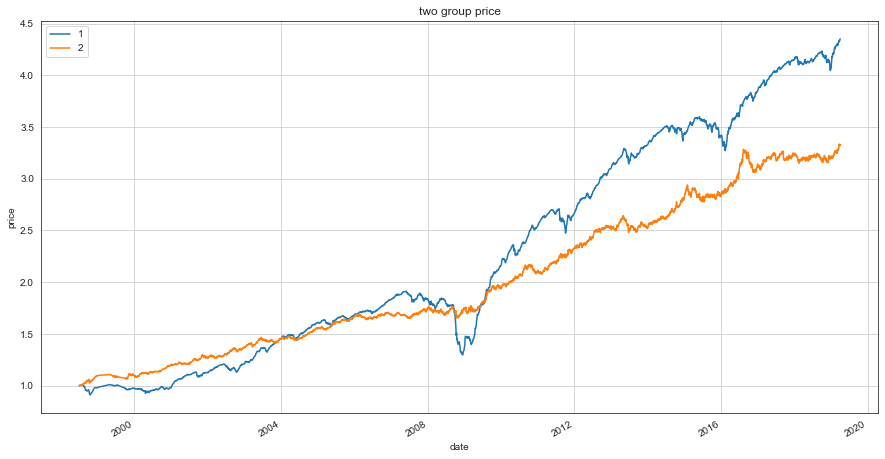

In [26]:
assets.groupby(level=0, axis=1).mean().plot(figsize=(15, 8), title='two group price')
plt.grid()

plt.xlabel('date')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

**Two observations:**
- Type 1 have higher cumulative return but dipped greatly during financial crisis
- Type 2 have lower cumulative return but relatively stable suring financial crisis.

(-0.01, 0.01)

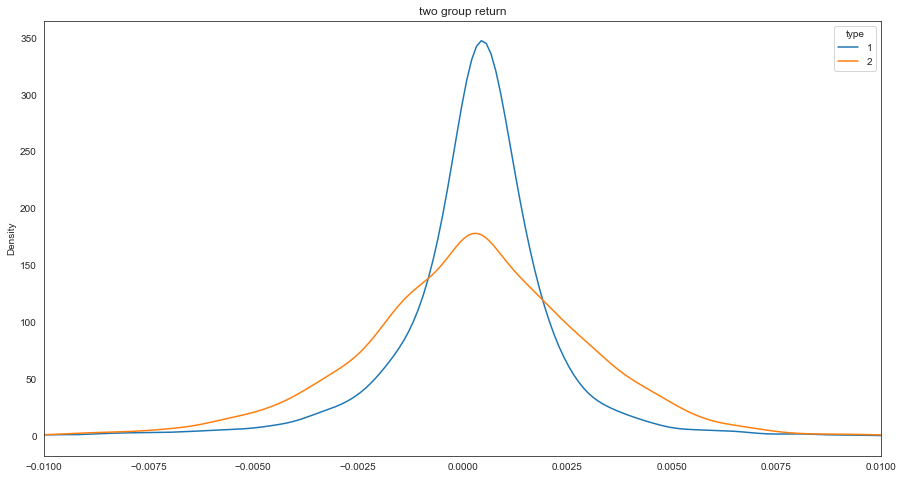

In [27]:
# caculate the volatility of the assets

# daily return two types compare
returns.groupby(level=0, axis=1).mean().plot(kind='kde', figsize=(15, 8), title='two group return')
plt.xlim((-0.01,0.01))

# type 1 looks more volatile over all in the chart above, but here daily return is less volatile??

(-0.0075, 0.0075)

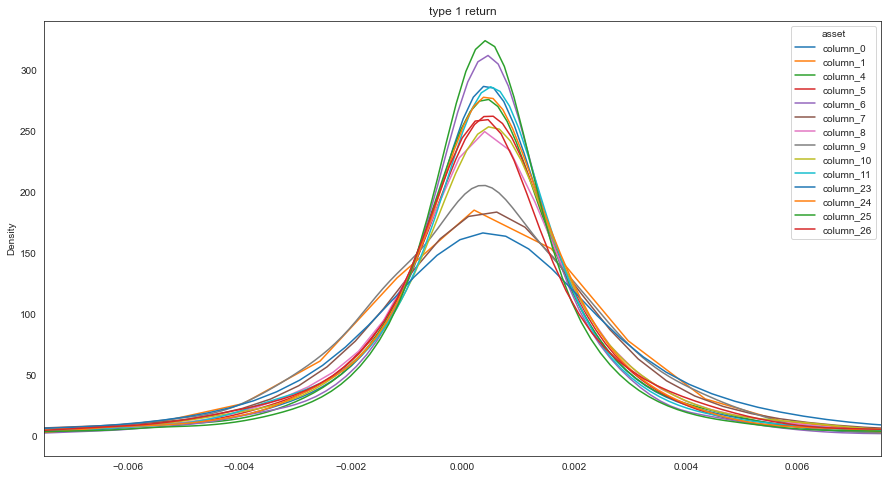

In [28]:
# have a closer look at the type 1 assets distribution:
returns['1'].plot(kind='kde', figsize=(15, 8), title='type 1 return')
plt.xlim((-0.0075,0.0075))

(-0.0075, 0.0075)

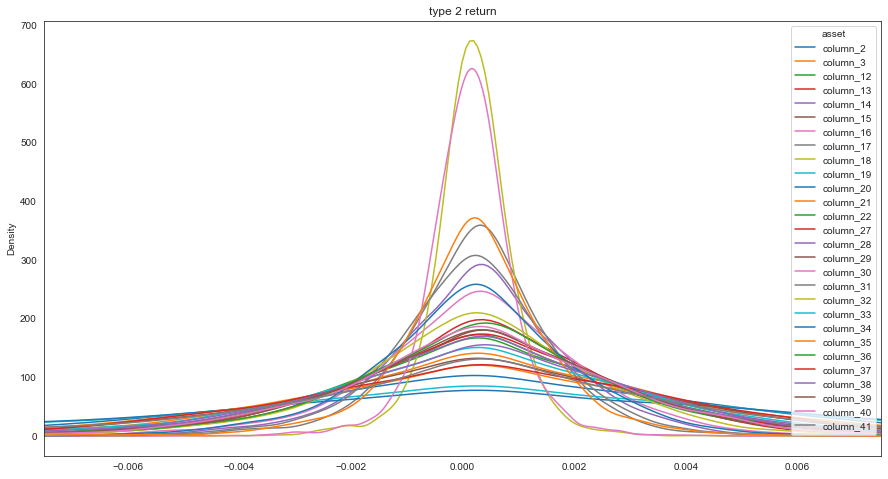

In [29]:
# have a closer look at the type 2 assets: return spread varies more!
returns['2'].plot(kind='kde', figsize=(15, 8), title='type 2 return')
plt.xlim((-0.0075,0.0075))

In [30]:
# over all sharpe ratio
print('Returns by ', returns.mean().groupby('type').mean())
print('\n')
print('Volatility by ', returns.std().groupby('type').mean())
print('\n')
sharpe = returns.mean()/returns.std()
sharpe.groupby(['type']).mean()
# type 2 has slightly higher sharpe ratio

Returns by  type
1    0.000283
2    0.000231
dtype: float64


Volatility by  type
1    0.004123
2    0.003015
dtype: float64




type
1    0.076406
2    0.089578
dtype: float64

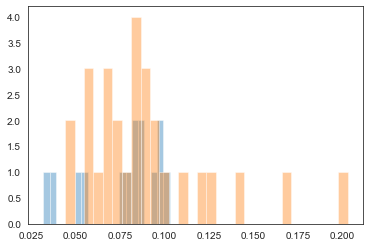

In [31]:
sns.distplot(sharpe['1'], bins=20, kde=False)
sns.distplot(sharpe['2'], bins=30, kde=False)

In [32]:
# hightest and lowest sharpe ratios
print('Highest', sharpe.idxmax())
print('Lowest', sharpe.idxmin())

Highest ('2', 'column_18')
Lowest ('1', 'column_1')


<a id="opt"></a>
## Portfolio optimisation

In [33]:
assets.head()

type               1                   2                   1            \
asset       column_0  column_1  column_2  column_3  column_4  column_5   
timestamp                                                                
1998-06-30  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1998-07-01  1.000639  1.000231  1.001681  1.001436  1.000201  1.000721   
1998-07-02  1.001075  1.001565  1.004094  1.002960  1.000403  1.001494   
1998-07-03  1.001327  1.001850  1.005903  1.002070  1.000604  1.001757   
1998-07-06  1.002428  1.002745  1.006103  1.004412  1.005085  1.003401   

type                                                                    \
asset       column_6  column_7  column_8  column_9 column_10 column_11   
timestamp                                                                
1998-06-30  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1998-07-01  1.000516  1.000199  0.999262  1.003684  0.999488  1.000748   
1998-07-02  1.001214  1.000647  0.999522  1.004528  1.000276  1.001402   
1998-07-03  1.001464  1.000896  0.999783  1.003325  1.000512  1.001629   
1998-07-06  1.002337  1.002904  1.000565  1.004618  1.000962  1.002964   

type               2                                                    \
asset      column_12 column_13 column_14 column_15 column_16 column_17   
timestamp                                                                
1998-06-30  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1998-07-01  1.002032  1.002676  0.998205  1.005220  1.001236  1.000731   
1998-07-02  1.003077  1.003422  0.998771  1.005726  1.002610  1.001470   
1998-07-03  1.002885  1.003430  0.997996  1.004407  1.001599  1.000901   
1998-07-06  1.004089  1.003888  0.999434  1.005154  1.003759  1.002958   

type                                                                 1  \
asset      column_18 column_19 column_20 column_21 column_22 column_23   
timestamp                                                                
1998-06-30  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1998-07-01  0.985817  1.001219  1.001317  1.001020  1.000760  1.000215   
1998-07-02  0.985736  1.003519  1.003845  1.002863  1.001875  0.999113   
1998-07-03  0.985575  1.002814  1.003063  1.002310  1.001390  0.999337   
1998-07-06  0.986783  1.006291  1.006626  1.005616  1.004310  1.000837   

type                                             2                      \
asset      column_24 column_25 column_26 column_27 column_28 column_29   
timestamp                                                                
1998-06-30  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1998-07-01  1.000698  1.000300  1.000207  1.001202  1.000597  1.000852   
1998-07-02  1.001293  1.002420  1.000414  1.002550  1.002037  1.002230   
1998-07-03  1.001521  1.002674  1.000620  1.002413  1.001489  1.001716   
1998-07-06  1.002979  1.003819  1.003157  1.004616  1.004000  1.004473   

type                                                                    \
asset      column_30 column_31 column_32 column_33 column_34 column_35   
timestamp                                                                
1998-06-30  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1998-07-01  1.000331  1.000591  1.000634  1.000811  1.000623  1.000960   
1998-07-02  1.000515  1.001307  1.001734  1.001932  1.001436  1.001341   
1998-07-03  1.000334  1.000913  1.001210  1.001464  1.001041  1.000580   
1998-07-06  1.001453  1.002970  1.003903  1.004480  1.003352  1.002527   

type                                                                    
asset      column_36 column_37 column_38 column_39 column_40 column_41  
timestamp                                                               
1998-06-30  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1998-07-01  1.001574  1.001118  1.001480  1.001162  1.000710  1.000918  
1998-07-02  1.002878  1.002523  1.002695  1.002707  1.001419  1.002016  
1998

In [34]:
# log the return
ret_log = np.log(assets/assets.shift(1))[1:]
ret_log.head()

type               1                   2                   1            \
asset       column_0  column_1  column_2  column_3  column_4  column_5   
timestamp                                                                
1998-07-01  0.000638  0.000231  0.001679  0.001435  0.000201  0.000721   
1998-07-02  0.000437  0.001333  0.002407  0.001521  0.000201  0.000772   
1998-07-03  0.000252  0.000285  0.001800 -0.000888  0.000201  0.000262   
1998-07-06  0.001099  0.000892  0.000198  0.002335  0.004468  0.001640   
1998-07-07 -0.000025  0.000646 -0.000347 -0.001327  0.001043  0.000389   

type                                                                    \
asset       column_6  column_7  column_8  column_9 column_10 column_11   
timestamp                                                                
1998-07-01  0.000516  0.000199 -0.000739  0.003677 -0.000512  0.000748   
1998-07-02  0.000697  0.000448  0.000261  0.000841  0.000788  0.000653   
1998-07-03  0.000250  0.000249  0.000261 -0.001198  0.000236  0.000227   
1998-07-06  0.000871  0.002004  0.000782  0.001288  0.000449  0.001332   
1998-07-07  0.000325 -0.000364 -0.001407  0.001018  0.000842  0.000555   

type               2                                                    \
asset      column_12 column_13 column_14 column_15 column_16 column_17   
timestamp                                                                
1998-07-01  0.002030  0.002673 -0.001797  0.005207  0.001235  0.000731   
1998-07-02  0.001043  0.000743  0.000567  0.000503  0.001371  0.000739   
1998-07-03 -0.000192  0.000008 -0.000777 -0.001313 -0.001009 -0.000569   
1998-07-06  0.001200  0.000456  0.001440  0.000743  0.002155  0.002053   
1998-07-07 -0.000058  0.000734  0.000131  0.002342 -0.001085 -0.001179   

type                                                                 1  \
asset      column_18 column_19 column_20 column_21 column_22 column_23   
timestamp                                                                
1998-07-01 -0.014285  0.001219  0.001316  0.001020  0.000760  0.000215   
1998-07-02 -0.000082  0.002294  0.002522  0.001839  0.001113 -0.001102   
1998-07-03 -0.000163 -0.000702 -0.000780 -0.000552 -0.000484  0.000224   
1998-07-06  0.001225  0.003461  0.003546  0.003293  0.002912  0.001499   
1998-07-07 -0.000490 -0.002704 -0.002833 -0.002442 -0.001876 -0.001060   

type                                             2                      \
asset      column_24 column_25 column_26 column_27 column_28 column_29   
timestamp                                                                
1998-07-01  0.000697  0.000300  0.000207  0.001202  0.000597  0.000851   
1998-07-02  0.000595  0.002118  0.000207  0.001345  0.001438  0.001376   
1998-07-03  0.000227  0.000253  0.000207 -0.000137 -0.000547 -0.000513   
1998-07-06  0.001455  0.001141  0.002531  0.002195  0.002505  0.002748   
1998-07-07  0.000000  0.000375  0.001154 -0.001358 -0.001158 -0.001901   

type                                                                    \
asset      column_30 column_31 column_32 column_33 column_34 column_35   
timestamp                                                                
1998-07-01  0.000331  0.000591  0.000634  0.000810  0.000623  0.000960   
1998-07-02  0.000184  0.000715  0.001099  0.001120  0.000812  0.000380   
1998-07-03 -0.000181 -0.000394 -0.000523 -0.000467 -0.000395 -0.000760   
1998-07-06  0.001119  0.002053  0.002686  0.003008  0.002307  0.001945   
1998-07-07 -0.000421 -0.001269 -0.001637 -0.001975 -0.001407 -0.001212   

type                                                                    
asset      column_36 column_37 column_38 column_39 column_40 column_41  
timestamp                                                               
1998-07-01  0.001573  0.001117  0.001479  0.001162  0.000709  0.000918  
1998-07-02  0.001302  0.001402  0.001213  0.001542  0.000709  0.001097  
1998-07-03 -0.000487 -0.000410 -0.000157 -0.000214 -0.000192 -0.000977  
1998

### Monte Carlo simulation

In [67]:
np.random.seed(42)

num_port = 10000
all_weights = np.zeros((num_port, len(ret_log.columns)))
ret_arr = np.zeros(num_port)
vol_arr = np.zeros(num_port)
sharpe_arr = np.zeros(num_port)

for idx in range(num_port):
    weights = np.array(np.random.random(42))
    weights = weights/np.sum(weights)
    all_weights[idx, :] = weights
    ret_arr[idx] = np.sum((ret_log.mean() * weights)*252)
    vol_arr[idx] = np.sqrt(np.dot(weights.T, np.dot(ret_log.cov() * 252, weights)))
    sharpe_arr[idx] = ret_arr[idx]/vol_arr[idx]


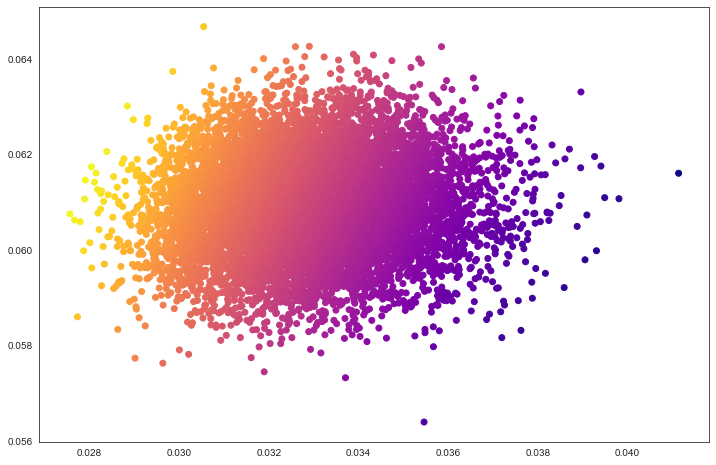

In [68]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')

**The bullet shape hasn't materialised, as I discover later, the optimal portfolio mostly contains only a few of the assets.**

In [110]:
def get_ret_vol_sr(weights, data):
    """
    Takes in porfolio weights, returns array of return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(data.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(data.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [111]:
from scipy.optimize import minimize

In [119]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights, ret_log)[2] * -1

In [120]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [121]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [122]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1))

In [123]:
# Initial Guess (equal distribution)
init_guess = [1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42,1/42]

In [126]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [127]:
opt_results

     fun: -3.8683546067992536
     jac: array([-2.11030245e-04,  1.42263237e+00,  5.94732779e+00,  5.42676944e+00,
        9.30726528e-05,  1.19544989e+00,  2.11693168e-01,  1.46814653e+00,
       -2.96145678e-04,  4.04586023e+00,  1.98721886e-04,  1.46903655e+00,
        3.98892310e+00,  3.96752232e+00,  2.30728313e+00,  4.59584370e+00,
        3.01723036e+00,  1.27504224e+00,  6.72042370e-05,  6.51558587e+00,
        7.03757197e+00,  5.00178158e+00,  3.35135931e+00,  2.35238671e-03,
       -5.93066216e-04, -2.80737877e-04,  8.86619091e-05,  3.90021339e+00,
        2.88301510e+00,  4.11599940e+00,  1.30534172e-05,  1.48556802e+00,
        2.64834106e+00,  3.88753384e+00,  1.89027596e+00,  8.57461900e-01,
        3.42114460e+00,  4.03773430e+00,  3.59431285e+00,  3.61252755e+00,
        2.38833478e+00,  4.08150974e+00])
 message: 'Optimization terminated successfully'
    nfev: 874
     nit: 20
    njev: 20
  status: 0
 success: True
       x: array([3.59042348e-02, 4.73200724e-14, 4.5

**Optimal weights and assets**

In [84]:
pd.DataFrame({'asset': data.columns, 'optimal_weights': opt_results.x.round(3)}).sort_values('optimal_weights', ascending=False).head(10)

asset  optimal_weights
18  column_18            0.493
30  column_30            0.319
24  column_24            0.071
26  column_26            0.036
0    column_0            0.036
25  column_25            0.019
4    column_4            0.018
23  column_23            0.005
10  column_10            0.002
38  column_38            0.000

As we can see here asset 18 and 30 contribute to the lion share of the portfolio.

In [89]:
print('The optimal average return is {}, volitility {}, and Sharpe ratio {}'
      .format(get_ret_vol_sr(opt_results.x)[0].round(3), get_ret_vol_sr(opt_results.x)[1].round(3), get_ret_vol_sr(opt_results.x)[2].round(3)))

The optimal average return is 0.049, volitility 0.013, and Sharpe ratio 3.868


**Reconstruct the portfolio with only asset 18, 30, 24, 26, and recalculate with Monte Carlo simulation**

In [98]:
best_port = ret_log.droplevel('type', axis=1)[['column_18', 'column_30', 'column_24', 'column_26']]

In [150]:
np.random.seed(42)

num_port = 25000
all_weights = np.zeros((num_port, len(best_port.columns)))
ret_arr = np.zeros(num_port)
vol_arr = np.zeros(num_port)
sharpe_arr = np.zeros(num_port)

for idx in range(num_port):
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    all_weights[idx, :] = weights
    ret_arr[idx] = np.sum((best_port.mean() * weights)*252)
    vol_arr[idx] = np.sqrt(np.dot(weights.T, np.dot(best_port.cov() * 252, weights)))
    sharpe_arr[idx] = ret_arr[idx]/vol_arr[idx]

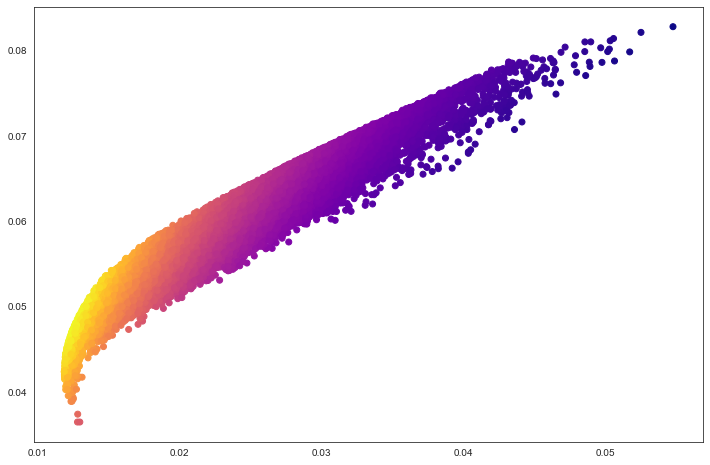

In [151]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')

**More formally**

In [159]:
init_guess = [0.25, 0.25, 0.25, 0.25]
bounds = [(0,1), (0,1),(0,1), (0,1)]

In [160]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights, best_port)[2] * -1

In [161]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [162]:
pd.DataFrame({'asset': ['column_18', 'column_30', 'column_24', 'column_26'], 'optimal_weights': opt_results.x.round(3)}).sort_values('optimal_weights', ascending=False)

asset  optimal_weights
3  column_26              1.0
0  column_18              0.0
1  column_30              0.0
2  column_24              0.0

<a id="OptFrt"></a>
## Optimal frontier

In [104]:
# all optimal frontier


# Our returns go from 0 to somewhere along 0.6
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.6,100) # Change 100 to a lower number for slower computers!

In [134]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights, best_port)[1] 

In [140]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w, best_port)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

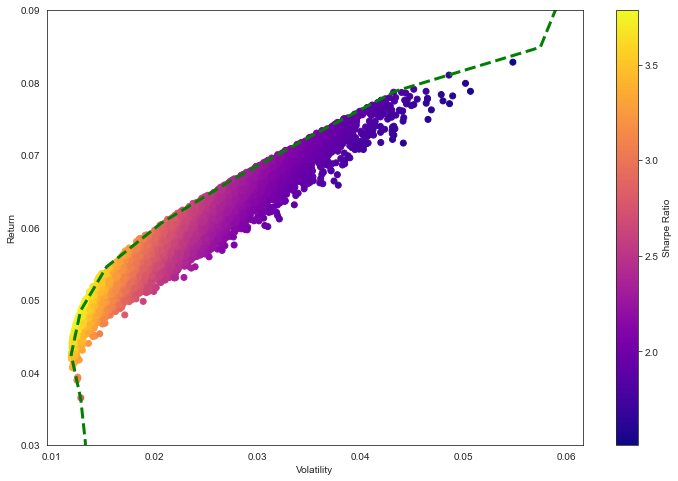

In [144]:
# plot out
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.ylim(0.03, 0.09)



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

<a id="sp"></a>
## Compare to benchmark SP500 from 01/03/2002 - 04/02/2019

In [127]:
start = datetime(2002,1,3)
end = datetime(2019,4,2)

In [238]:
# performance of the porfolio 2002-2009
ret_log_com = ret_log['2002-01-04':'2019-04-01']
ret_log_com

type               1                   2                   1            \
asset       column_0  column_1  column_2  column_3  column_4  column_5   
timestamp                                                                
2002-01-04  0.000272  0.001527 -0.002585 -0.001961  0.000834  0.000777   
2002-01-07  0.001102  0.001207  0.007964  0.004861  0.000723  0.003138   
2002-01-08  0.001859 -0.008692  0.000578  0.002793  0.000639  0.001623   
2002-01-09  0.001168  0.001715 -0.003245 -0.003686  0.010318  0.003055   
2002-01-10  0.000271  0.004803  0.005855  0.004360  0.001926  0.003387   
...              ...       ...       ...       ...       ...       ...   
2019-03-27  0.001321  0.001277  0.000913  0.001164 -0.001004 -0.000745   
2019-03-28 -0.001252 -0.000424 -0.001794  0.000063  0.002372  0.000893   
2019-03-29  0.004206 -0.000003 -0.000382  0.001073  0.001090  0.001267   
2019-03-31  0.000144  0.000165  0.000200  0.000197  0.000165  0.000169   
2019-04-01  0.001277  0.002401 -0.003277 -0.002050  0.000909  0.002757   

type                                                                    \
asset       column_6  column_7  column_8  column_9 column_10 column_11   
timestamp                                                                
2002-01-04  0.000054  0.002315  0.000265 -0.001443  0.001564  0.002768   
2002-01-07  0.002184  0.000776  0.000795  0.003293  0.001948  0.002618   
2002-01-08  0.000252 -0.000088  0.000253  0.002285  0.000273  0.000720   
2002-01-09 -0.000679 -0.000273  0.000265 -0.001981 -0.000241  0.001493   
2002-01-10  0.001647  0.002238  0.001600  0.002897  0.000900  0.002671   
...              ...       ...       ...       ...       ...       ...   
2019-03-27 -0.000180 -0.000242  0.001050  0.001002  0.000569  0.000265   
2019-03-28  0.001254  0.000904  0.000025  0.000581 -0.001218  0.000461   
2019-03-29  0.000765  0.001288  0.002892  0.001536  0.003076  0.002186   
2019-03-31  0.000173  0.000179  0.000152  0.000207  0.000190  0.000176   
2019-04-01  0.002796  0.002045 -0.000084 -0.000869  0.002980  0.001869   

type               2                                                    \
asset      column_12 column_13 column_14 column_15 column_16 column_17   
timestamp                                                                
2002-01-04 -0.001888 -0.001622 -0.001285 -0.001490 -0.001383 -0.001209   
2002-01-07  0.004707  0.003666  0.001930  0.004059  0.002327  0.001235   
2002-01-08  0.001159  0.001642  0.001262  0.002257  0.002329  0.000571   
2002-01-09 -0.002609 -0.002817 -0.001825 -0.002212 -0.001700 -0.002010   
2002-01-10  0.003850  0.003246  0.002042  0.003156  0.002579  0.001537   
...              ...       ...       ...       ...       ...       ...   
2019-03-27  0.000833  0.001468  0.000692  0.001116  0.000867  0.000550   
2019-03-28 -0.000294  0.000968  0.000418  0.000407  0.000782  0.000447   
2019-03-29  0.000718  0.002196  0.001214  0.001403  0.001689  0.001185   
2019-03-31  0.000203  0.000212  0.000205  0.000215  0.000205  0.000189   
2019-04-01 -0.001554 -0.000131 -0.000495 -0.001498 -0.000166 -0.000223   

type                                                                 1  \
asset      column_18 column_19 column_20 column_21 column_22 column_23   
timestamp                                                                
2002-01-04 -0.001081 -0.004014 -0.004396 -0.003191 -0.002757 -0.031064   
2002-01-07  0.000225  0.008716  0.009821  0.006340  0.003967  0.000579   
2002-01-08  0.000100 -0.001652 -0.002502  0.000175  0.000403 -0.000628   
2002-01-09 -0.001413 -0.004931 -0.005491 -0.003727 -0.002964  0.011316   
2002-01-10  0.001007  0.005429  0.006008  0.004188  0.003212  0.014459   
...              ...       ...       ...       ...       ...       ...   
2019-03-27  0.000228  0.000700  0.000722  0.000553  0.000404  0.001189   
2019-03-28  0.000064 -0.002912 -0.003283 -0.000384 -0.000061 -0.000186   
2019-03-29  0.000584 -0.001797 -0.002041 -0.000138  0.000657  0.001497   
2

<a id='weight'> </a>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

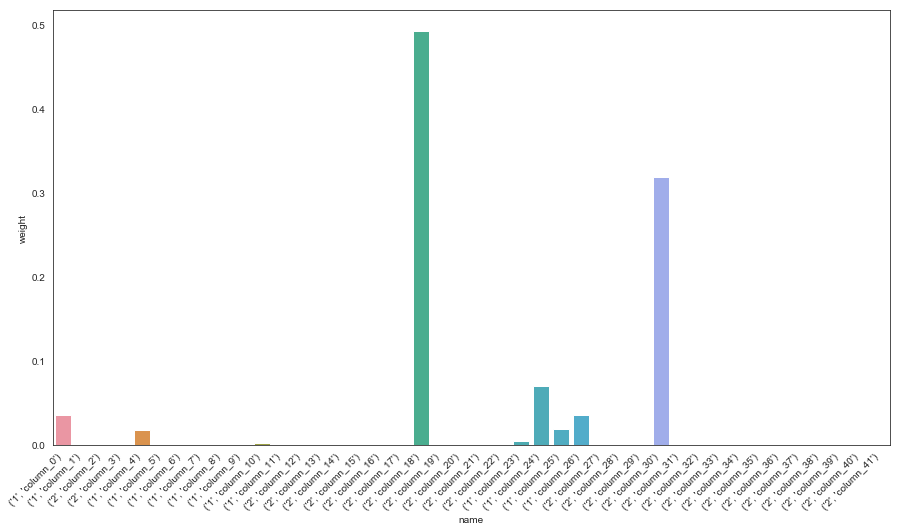

In [239]:
portfolio_weight = pd.DataFrame(list(zip(ret_log_com.columns, opt_results.x)), columns=['name', 'weight'])
portfolio_weight.index = portfolio_weight['name']
portfolio_weight.drop('name', axis=1, inplace=True)

#portfolio_weight.plot(kind='bar', figsize=(15,8))
plt.figure(figsize=(15,8))
sns.barplot(x=portfolio_weight.index, y='weight', data=portfolio_weight)
plt.xticks(rotation=45, ha='right')

# the real porfolio seems to be only 0 4 6 8 18 23 24 26 30

In [240]:
portfolio_names = [('1','column_0'), ('1','column_4'), ('1','column_10'), ('2','column_18'), ('1','column_23'), ('1','column_24'), ('1','column_25'),('1','column_26'), ('2','column_30')]

In [241]:
# select out only ones show significant weight
portfolio_weight = portfolio_weight.transpose()[portfolio_names]
# normalise
portfolio_weight = portfolio_weight/(portfolio_weight.sum(axis=1).values[0])

In [242]:
portfolio_weight.sum(axis=1)

weight    1.0
dtype: float64

In [321]:
portfolio_ret_log = ret_log_com[portfolio_names]
portfolio_ret_log_w = portfolio_ret_log*np.array(portfolio_weight)

In [323]:
portfolio_ret_log_w

type               1                                 2             1  \
asset       column_0  column_4     column_10 column_18     column_23   
timestamp                                                              
2002-01-04  0.000010  0.000015  3.651592e-06 -0.000533 -1.667606e-04   
2002-01-07  0.000040  0.000013  4.549073e-06  0.000111  3.106948e-06   
2002-01-08  0.000067  0.000012  6.364597e-07  0.000049 -3.373342e-06   
2002-01-09  0.000042  0.000187 -5.624439e-07 -0.000696  6.074941e-05   
2002-01-10  0.000010  0.000035  2.101072e-06  0.000496  7.762274e-05   
...              ...       ...           ...       ...           ...   
2019-03-27  0.000047 -0.000018  1.329739e-06  0.000112  6.382450e-06   
2019-03-28 -0.000045  0.000043 -2.844218e-06  0.000031 -9.959939e-07   
2019-03-29  0.000151  0.000020  7.184066e-06  0.000288  8.036004e-06   
2019-03-31  0.000005  0.000003  4.448570e-07  0.000106  1.012806e-06   
2019-04-01  0.000046  0.000016  6.958386e-06 -0.000013  7.912831e-06   

type                                             2  
asset      column_24 column_25 column_26 column_30  
timestamp                                           
2002-01-04  0.000021  0.000002  0.000009 -0.000704  
2002-01-07  0.000282  0.000016  0.000132  0.000088  
2002-01-08  0.000099  0.000009  0.000040 -0.000040  
2002-01-09  0.000043  0.000018  0.000003 -0.000524  
2002-01-10  0.000110  0.000033 -0.000023  0.000373  
...              ...       ...       ...       ...  
2019-03-27 -0.000031 -0.000012  0.000036 -0.000020  
2019-03-28  0.000048  0.000026 -0.000008  0.000010  
2019-03-29  0.000238  0.000033  0.000033  0.000054  
2019-03-31  0.000013  0.000003  0.000006  0.000062  
2019-04-01  0.000167  0.000020 -0.000014 -0.000150  

[4505 rows x 9 columns]

In [245]:
portfolio_ret_log_sum = portfolio_ret_log.sum(axis=1)
portfolio_ret_log_sum

timestamp
2002-01-04   -0.001343
2002-01-07    0.000689
2002-01-08    0.000232
2002-01-09   -0.000867
2002-01-10    0.001113
                ...   
2019-03-27    0.000122
2019-03-28    0.000102
2019-03-29    0.000831
2019-03-31    0.000200
2019-04-01    0.000086
Length: 4505, dtype: float64

In [246]:
# # plot portfolio_ret
# portfolio_ret.plot(alpha=0.8, figsize=(15, 8), title='portfolio return')
# plt.grid()

# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.legend(loc='best', ncol=4)
# plt.show()

(-0.012, 0.012)

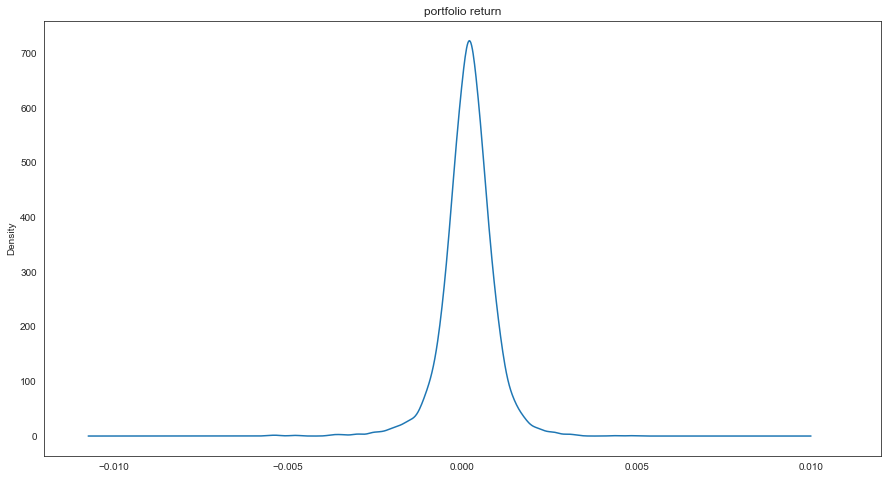

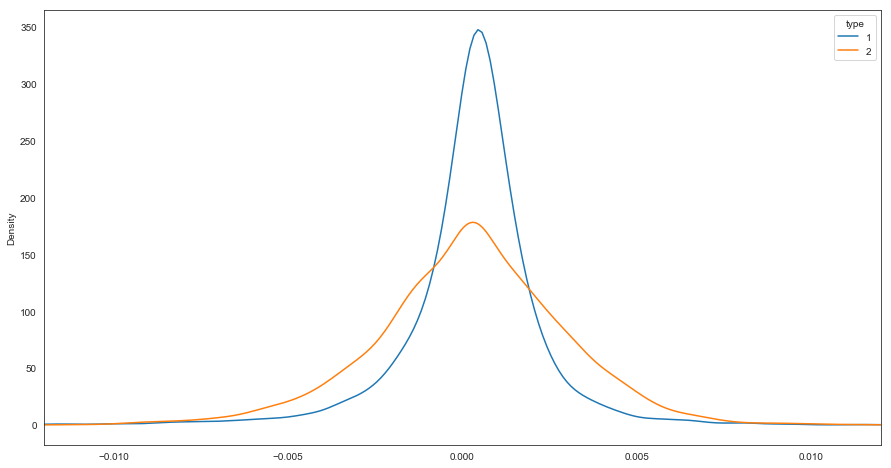

In [251]:
portfolio_ret_log_sum.plot(kind='kde', figsize=(15, 8), title='portfolio return')
plt.xlim(-0.012,0.012)
returns.groupby(level=0, axis=1).mean().plot(kind='kde', figsize=(15, 8))
plt.xlim(-0.012,0.012)

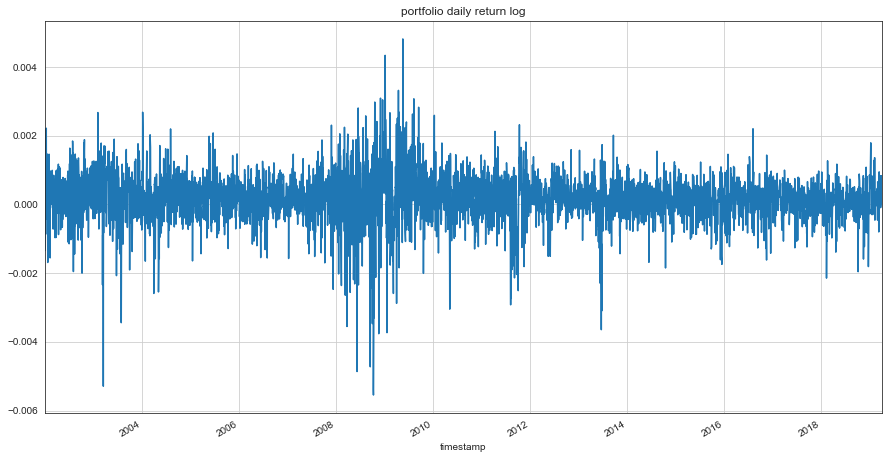

In [252]:
# plot portfolio daily return:
portfolio_ret_log_sum.plot(figsize=(15,8), title='portfolio daily return log')
plt.grid()

In [263]:
portfolio_assets = assets['2002-01-03':'2019-04-01'][portfolio_names]*np.array(portfolio_weight)

In [296]:
portfolio_assets_sum = portfolio_assets.sum(axis=1)
portfolio_assets_sum = portfolio_assets_sum/portfolio_assets_sum[0]
portfolio_assets_sum

timestamp
2002-01-03    1.000000
2002-01-04    0.998676
2002-01-07    0.999343
2002-01-08    0.999565
2002-01-09    0.998644
                ...   
2019-03-27    2.292016
2019-03-28    2.292288
2019-03-29    2.294815
2019-03-31    2.295261
2019-04-01    2.295887
Length: 4506, dtype: float64

In [324]:
#sharpe ratio
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array of return,volatility, sharpe ratio
    """
    #weights = np.array(weights)
    ret = np.sum(portfolio_ret_log.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights, np.dot(portfolio_ret_log.cov() * 252, weights.T)))
    sr = ret/vol
    return np.array([ret,vol,sr])


# sr = (252**0.5)*portfolio_ret_log_sum.mean()/portfolio_ret_log_sum.std()
# sr

In [363]:
# sharpe ratio

ret = np.sum(portfolio_ret_log.mean()*portfolio_weight, axis=1)*252
vol = np.sqrt(np.dot(portfolio_weight, np.dot(portfolio_ret_log.cov()*252, np.array(portfolio_weight.T))))
sr = float(ret[0]/vol)
print('Average log return:', float(ret))
print('Volatility:', float(vol))
print('Sharpe ratio:', sr)

Average log return: 0.04367221942200402
Volatility: 0.011540668943216672
Sharpe ratio: 3.7842017336155807


In [267]:
# performance of portfolio benchmark sp500 on ID quantopian

In [53]:
import yfinance as yf
def get_sp500(start_date, end_date):
    sp500 = yf.download('^GSPC', start_date, end_date)                        
    return sp500

In [100]:
sp500 = get_sp500(start,end)

# assume our portfolio data is all adjusted close
# keep adjusted close and normalise
sp = pd.DataFrame(sp500['Adj Close']/(sp500['Adj Close'][0]))


[*********************100%***********************]  1 of 1 completed


In [316]:
sp.head()

Adj Close
Date                 
2002-01-03   1.000000
2002-01-04   1.006213
2002-01-07   0.999674
2002-01-08   0.996087
2002-01-09   0.991307

In [99]:
sp_ret_log = np.log(sp/sp.shift(1))[1:]

In [101]:
sp_ret_log

Adj Close
Date                 
2002-01-04   0.006194
2002-01-07  -0.006520
2002-01-08  -0.003595
2002-01-09  -0.004810
2002-01-10   0.001220
...               ...
2019-03-26   0.007157
2019-03-27  -0.004655
2019-03-28   0.003583
2019-03-29   0.006712
2019-04-01   0.011502

[4339 rows x 1 columns]

<a id='compare'> </a>
**Cumulative return and daily return portfolio vs SP500**


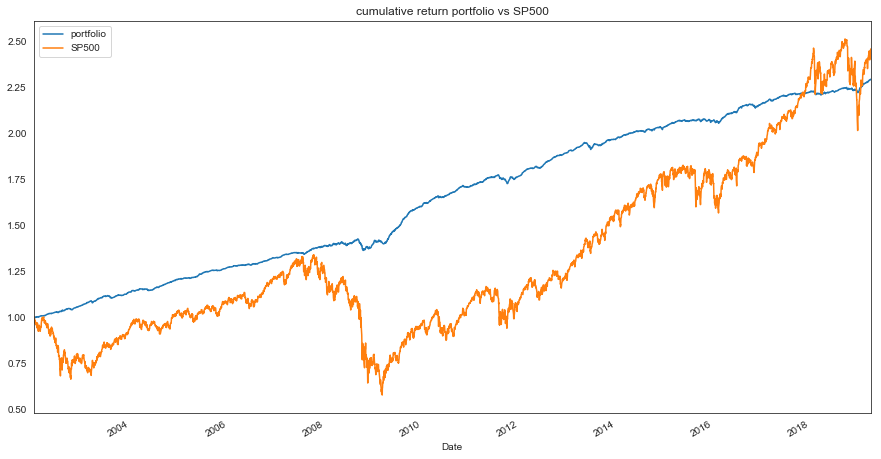

In [303]:
ax = portfolio_assets_sum.plot(figsize=(15,8), title='cumulative return portfolio vs SP500')
sp.plot(ax=ax)
plt.legend(['portfolio', 'SP500'])

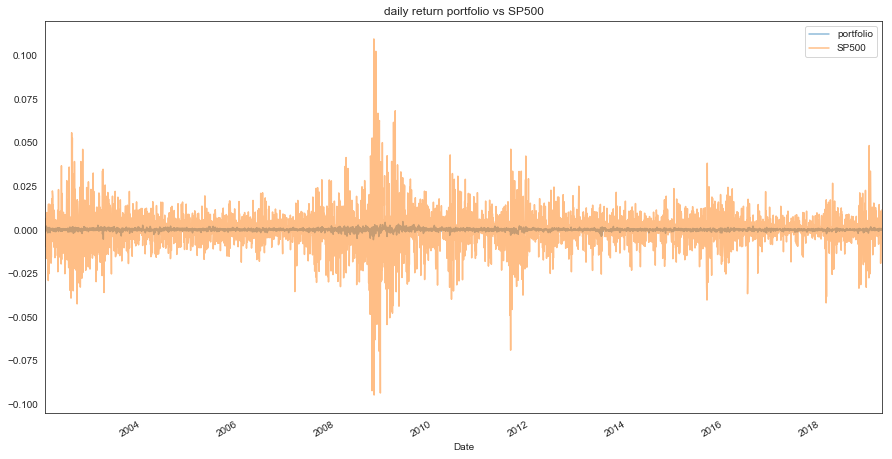

In [306]:
ax = portfolio_ret_log_sum.plot(figsize=(15,8), title='daily return portfolio vs SP500', alpha=0.5)
sp_ret_log.plot(ax=ax, alpha =0.5)
plt.legend(['portfolio', 'SP500'])

**compare sharpe ratio**
portfolio is 3.7842017336155767

In [364]:
print('Average SP500 log return', sp_ret_log.mean()*252)
print('Volatility SP500', sp_ret_log.std()*(252**0.5))
print('Sharpe ratio SP500', np.sqrt(252)*sp_ret_log.mean()/sp_ret_log.std())

Average SP500 log return Adj Close    0.052292
dtype: float64
Volatility SP500 Adj Close    0.187609
dtype: float64
Sharpe ratio SP500 Adj Close    0.27873
dtype: float64


### The portfolio is doing slightly better compared to SP500 in return, but much better in sharpe ratio

## Use pre 2019 to optimise, and 2019 to evaluate

In [396]:
# given log return data and start and end datetime objects, return optimal results
def optimise(ret_log, start, end):
    #select the data with in the time scale
    portfolio_ret = ret_log[start:end]
    
    def get_ret_vol_sr(weights):
    #Takes in weights, returns array or return,volatility, sharpe ratio
        weights = np.array(weights)
        ret = np.sum(portfolio_ret.mean() * weights) * 252
        vol = np.sqrt(np.dot(weights.T, np.dot(portfolio_ret.cov() * 252, weights)))
        sr = ret/vol
        return np.array([ret,vol,sr])

    from scipy.optimize import minimize

    def neg_sharpe(weights):
        return  get_ret_vol_sr(weights)[2] * -1

    # Contraints
    def check_sum(weights):
        #Returns 0 if sum of weights is 1.0
        return np.sum(weights) - 1

    # By convention of minimize function it should be a function that returns zero for conditions
    cons = ({'type':'eq','fun': check_sum})

    # 0-1 bounds for each weight, need to update for each project
    bounds = tuple((0,1) for col in portfolio_ret.columns)

    # Initial Guess (equal distribution)
    init_guess = [1/len(portfolio_ret.columns) for col in portfolio_ret.columns]

    # Sequential Least SQuares Programming (SLSQP).
    opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    print('weights', opt_results.x)
    print('return, volatility, sharpe ratio', get_ret_vol_sr(opt_results.x))
    
    return opt_results


In [401]:
start = datetime(2016,1,1)
end = datetime(2019,1,1)

In [402]:
weight = optimise(ret_log, start, end).x

weights [1.21674905e-12 1.01449816e-01 2.20997924e-12 9.99938114e-13
 1.00444331e-01 1.37686747e-02 1.25078280e-12 1.19245635e-02
 1.17304825e-12 3.98882691e-13 3.45548616e-11 7.44647182e-13
 9.28743924e-13 8.79578328e-13 1.47026368e-13 5.99980495e-13
 1.08687479e-13 2.37822624e-11 7.32767482e-01 2.78537005e-11
 5.59318028e-11 2.38403952e-13 1.67747786e-13 1.71461469e-02
 1.88922985e-12 2.82569093e-13 2.24989887e-02 2.88212955e-12
 1.27015321e-12 5.75657776e-13 1.82944679e-13 7.62780385e-14
 1.27498192e-13 1.23006119e-13 6.50969599e-14 1.59019651e-13
 1.88144336e-11 9.71117114e-13 1.42041426e-12 2.63348757e-12
 5.80916296e-13 1.49564728e-12]
return, volatility, sharpe ratio [0.0301087  0.00851494 3.53598408]


In [403]:
def get_ret_vol_sr(weights):
    #Takes in weights, returns array or return,volatility, sharpe ratio
        weights = np.array(weights)
        ret = np.sum(portfolio_ret.mean() * weights) * 252
        vol = np.sqrt(np.dot(weights.T, np.dot(portfolio_ret.cov() * 252, weights)))
        sr = ret/vol
        return np.array([ret,vol,sr])

In [405]:
portfolio_ret = ret_log['2009-01-01':]

In [406]:
get_ret_vol_sr(weight)

array([0.0564113 , 0.01284962, 4.39011535])

**SP500

In [408]:
SP500_19 = sp_ret_log['2019-01-01':]

In [409]:
print('Average SP500 log return', SP500_19.mean()*252)
print('Volatility SP500', SP500_19.std()*(252**0.5))
print('Sharpe ratio SP500', np.sqrt(252)*SP500_19.mean()/sp_ret_log.std())

Average SP500 log return Adj Close    0.545887
dtype: float64
Volatility SP500 Adj Close    0.135747
dtype: float64
Sharpe ratio SP500 Adj Close    2.90971
dtype: float64


## More on the two types of assets

In [ ]:
assets.groupby(level=0, axis=1).mean().plot(figsize=(15,8))
plt.grid()

In [ ]:
portfolio_weight